In [1]:
from numpy import mean
from numpy import std
from numpy import dstack
from numpy import save, load
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras import Model
from keras.layers import LSTM, Conv1D, concatenate,GlobalMaxPooling1D,TimeDistributed, MaxPooling1D
#from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
#from tensorflow.keras import regularizers
import tensorflow as tf
import keras
import keras.utils
from keras import utils as np_utils

In [2]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/'

import numpy as np
x_train = np.load('gdrive/MyDrive/dataset2/trainX.npy')
y_train = np.load('gdrive/My Drive/dataset2/trainy.npy')
x_test = np.load('gdrive/My Drive/dataset2/testX.npy')
y_test = np.load('gdrive/My Drive/dataset2/testy.npy')
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

Mounted at /content/drive
Mounted at /content/gdrive
(44339, 128, 6) (44339, 20) (4936, 128, 6) (4936, 20)


In [3]:
from sklearn.model_selection import train_test_split
X_training, X_validation, y_training, y_validation = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

In [4]:
n_timesteps, n_features, n_outputs = x_train.shape[1], x_train.shape[2], y_train.shape[1]

In [5]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 126, 64)           1216      
                                                                 
 conv1d_1 (Conv1D)           (None, 124, 64)           12352     
                                                                 
 dropout (Dropout)           (None, 124, 64)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 62, 64)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3968)              0         
                                                                 
 dense (Dense)               (None, 100)               396900    
                                                        

In [6]:
callbacks = [keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]

In [7]:
history = model.fit(X_training, y_training, epochs=10, verbose=True, validation_data=(X_validation, y_validation), batch_size=100)

Epoch 1/10
355/355 [==============================] - 14s 6ms/step - loss: 0.3141 - accuracy: 0.9176 - val_loss: 0.1407 - val_accuracy: 0.9683
Epoch 2/10
355/355 [==============================] - 2s 5ms/step - loss: 0.0954 - accuracy: 0.9744 - val_loss: 0.1075 - val_accuracy: 0.9742
Epoch 3/10
355/355 [==============================] - 2s 5ms/step - loss: 0.0566 - accuracy: 0.9833 - val_loss: 0.0868 - val_accuracy: 0.9778
Epoch 4/10
355/355 [==============================] - 2s 5ms/step - loss: 0.0427 - accuracy: 0.9874 - val_loss: 0.0663 - val_accuracy: 0.9822
Epoch 5/10
355/355 [==============================] - 2s 5ms/step - loss: 0.0311 - accuracy: 0.9903 - val_loss: 0.0601 - val_accuracy: 0.9833
Epoch 6/10
355/355 [==============================] - 2s 5ms/step - loss: 0.0213 - accuracy: 0.9935 - val_loss: 0.0596 - val_accuracy: 0.9826
Epoch 7/10
355/355 [==============================] - 2s 5ms/step - loss: 0.0180 - accuracy: 0.9945 - val_loss: 0.0590 - val_accuracy: 0.9838
Epoch

In [23]:
import shap

# we use the first 100 training examples as our background dataset to integrate over
explainer = shap.DeepExplainer(model, x_train[:100])

# explain the first 10 predictions
# explaining each prediction requires 2 * background dataset size runs
shap_values = explainer.shap_values(x_test[:100])

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


In [24]:
shap.initjs()

import numpy as np



shap.force_plot(explainer.expected_value[0].numpy(), shap_values[0][0], x_test[0])

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


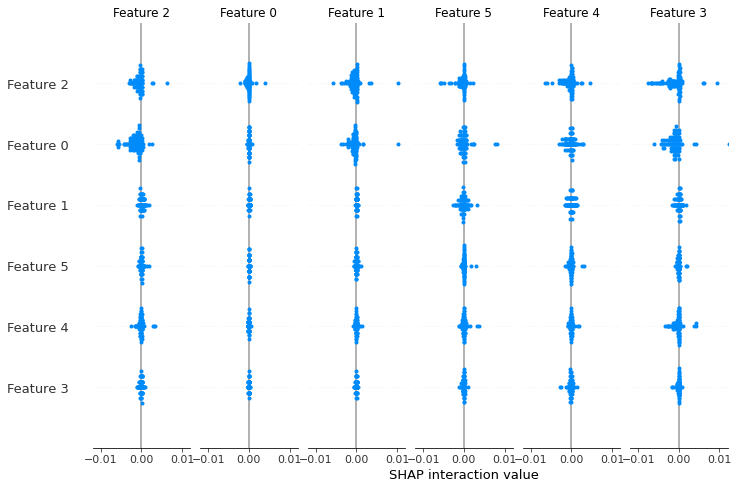

In [28]:
shap.summary_plot(shap_values[0], plot_type = 'bar')

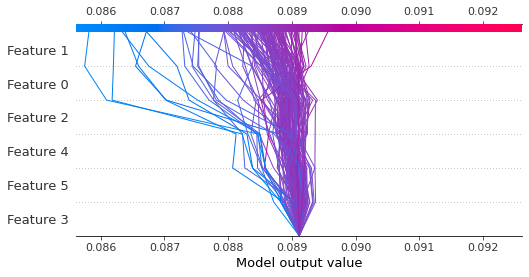

In [33]:
shap.decision_plot(explainer.expected_value[0].numpy(), shap_values[0][0], features = x_test[0,:])

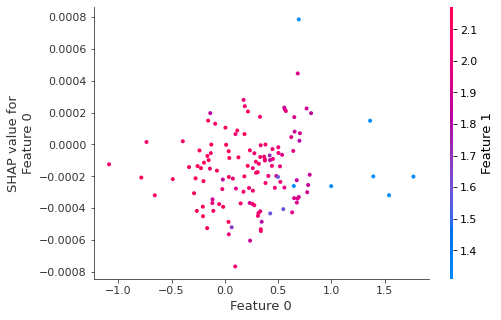

In [57]:
shap.dependence_plot('Feature 0', shap_values[0][0], x_train[0], interaction_index="Feature 1")


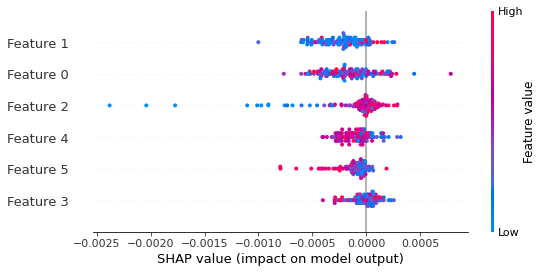

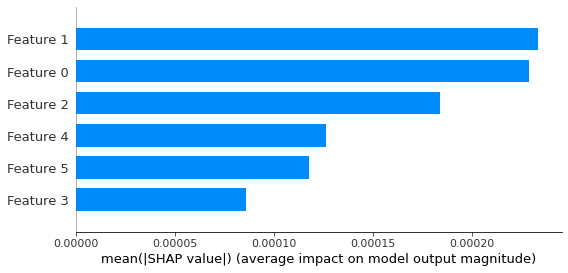

In [42]:
shap.summary_plot(shap_values[0][0], x_test[0],title="SHAP summary plot") 

# Generate summary bar plot 
shap.summary_plot(shap_values[0][0], x_test[0],plot_type="bar") 